In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

In [3]:
#read face images into a dict
faces = {}
for filename in os.listdir('../datasets/faces/'):
    if not filename.startswith('face0'):
        continue #not a faces pic
    faces[filename] = plt.imread(os.path.join('../datasets/faces',filename))

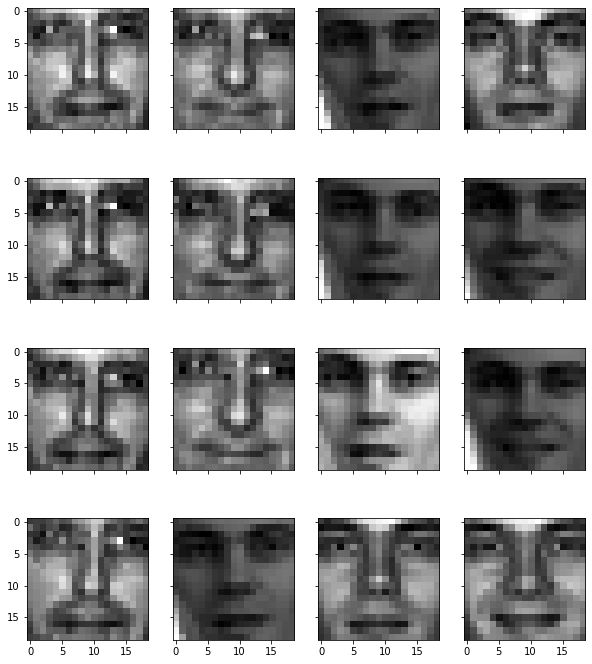

Face image shape: (19, 19)


In [4]:
#look at a subset of images
fig, axes = plt.subplots(4, 4, sharex = True, sharey = True, figsize = (10,12))
faceimages = list(faces.values())[:16]
for i in range(16):
    axes[i % 4][i // 4].imshow(faceimages[i], cmap = 'gray')
plt.show()

faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

In [5]:
#create matrix to perform PCA
facematrix = []
for key, val in faces.items():
    facematrix.append(val.flatten())

#(n_samples, n_pixels) matrix -> (2429, 19x19)
facematrix = np.array(facematrix)
facematrix_centered = facematrix - np.mean(facematrix, axis = 0)
print(facematrix.shape)

(2429, 361)


# Part A

In [6]:
pca = PCA().fit(facematrix_centered)

In [7]:
#print/store eigenvectors
#print(pca.components_)
eigenvectors = pca.components_[3:]
#print/store eigenvalues
eigenvalues = pca.explained_variance_[3:]
#make eigenvalue indices to plot against
eigenvalues_idx = range(1, len(eigenvalues) + 1)

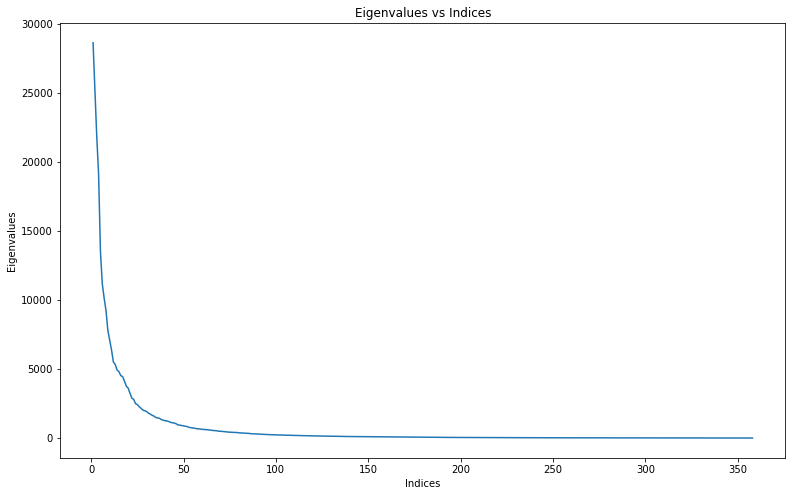

In [8]:
#plot eigenvalues
plt.figure(figsize = (13, 8))
plt.plot(eigenvalues_idx, eigenvalues)
plt.xlabel("Indices")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs Indices")
plt.savefig("Eigenvalues.png")
plt.show()

# Part B

In [9]:
two_pcas = PCA(n_components=2).fit(facematrix_centered)
faces_two = two_pcas.transform(facematrix_centered)

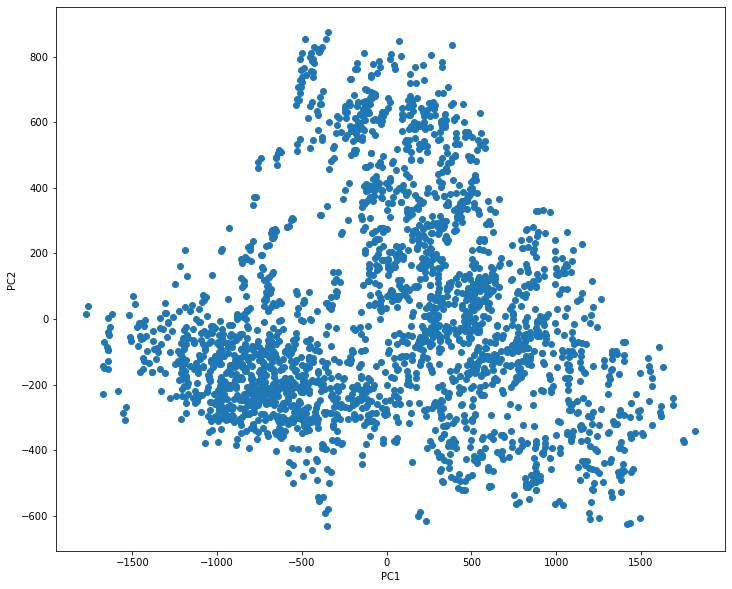

In [10]:
#plot projection onto PC1 and PC2
plt.figure(figsize = (12, 10))
plt.scatter(faces_two[:,0], faces_two[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("Faces Projection.png")
plt.show()

# Part C

In [11]:
bgs = {}
for filename in os.listdir('../datasets/faces/'):
    if not filename.startswith('B'):
        continue #not a background pic
    bgs[filename] = plt.imread(os.path.join('../datasets/faces',filename))

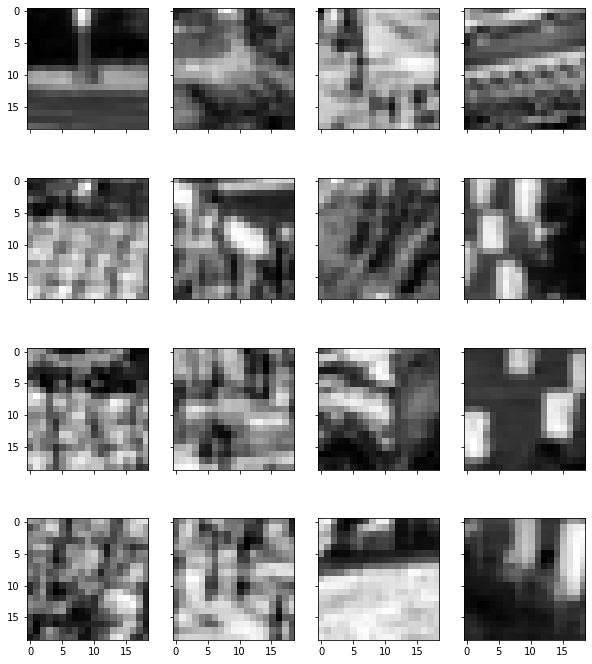

Background image shape: (19, 19)


In [12]:
fig, axes = plt.subplots(4, 4, sharex = True, sharey = True, figsize = (10,12))
bgimages = list(bgs.values())[:16]
for i in range(16):
    axes[i % 4][i // 4].imshow(bgimages[i], cmap = 'gray')
plt.show()

bgshape = list(bgs.values())[0].shape
print("Background image shape:", bgshape)

In [13]:
#create matrix
bgmatrix = []
bglabel = []
for key, val in bgs.items():
    bgmatrix.append(val.flatten())
    bglabel.append(key.split("_")[0])

#(n_samples, n_pixels) matrix -> (3699, 19x19)
bgmatrix = np.array(bgmatrix)
bgmatrix_centered = bgmatrix - np.mean(facematrix, axis = 0)
print(bgmatrix_centered.shape)

(3699, 361)


In [14]:
bgs_two = two_pcas.transform(bgmatrix_centered)

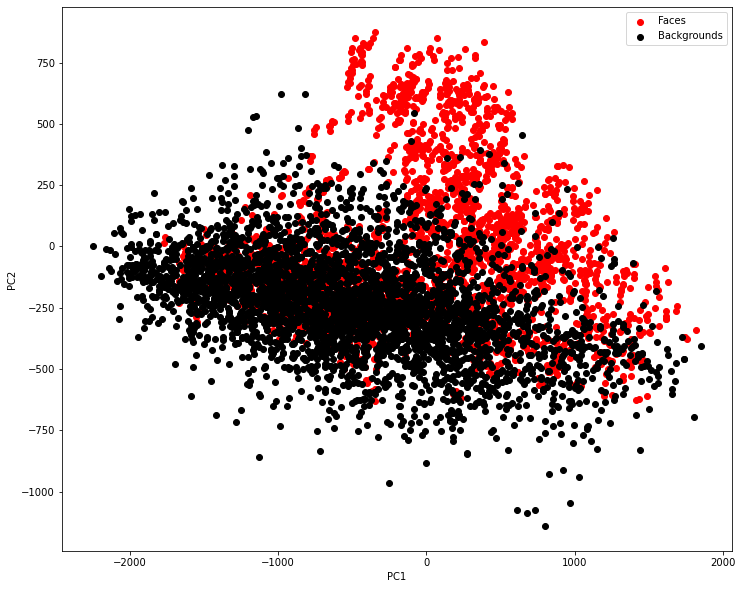

In [15]:
plt.figure(figsize = (12, 10))
plt.scatter(faces_two[:,0], faces_two[:,1], color = "red", label = "Faces")
plt.scatter(bgs_two[:,0], bgs_two[:,1], color = "black", label = "Backgrounds")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.savefig("Faces and Backgrounds Projections.png")
plt.show()

# Part D

In [16]:
fifteen_pca_components = pca.components_[:15]
first_comp = PCA(n_components=1).fit(facematrix_centered)
faces_one = first_comp.transform(facematrix_centered)
bgs_one = first_comp.transform(bgmatrix_centered)

In [17]:
#project of coordinates to PC plane
faceweights = fifteen_pca_components @ (facematrix_centered).T
bgweights = fifteen_pca_components @ (bgmatrix_centered).T

#create list for later storage
facedists = []
bgdists = []

for i in range(facematrix_centered.shape[0]):
    query_weight = fifteen_pca_components @ facematrix_centered[i, :, np.newaxis]
    facedists.append(np.sqrt(np.linalg.norm(faceweights - query_weight)))
    
for i in range(bgmatrix_centered.shape[0]):
    query_weight = fifteen_pca_components @ bgmatrix_centered[i, :, np.newaxis]
    bgdists.append(np.sqrt(np.linalg.norm(bgweights - query_weight)))

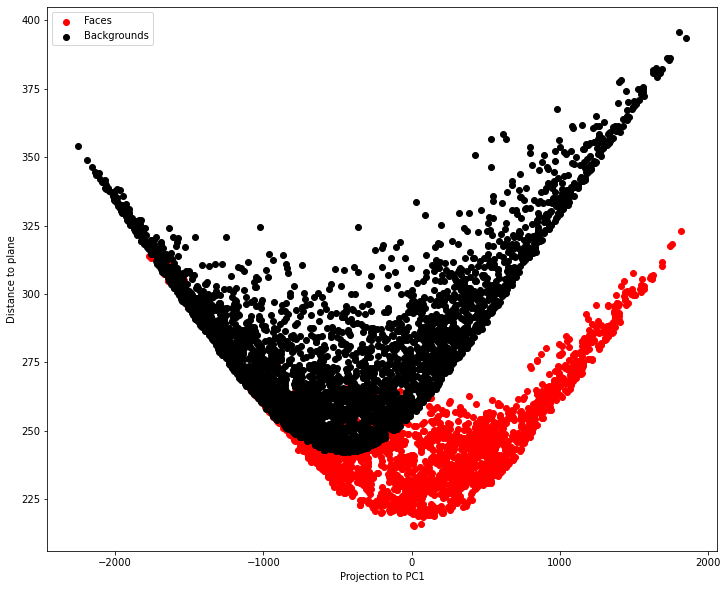

In [18]:
plt.figure(figsize = (12, 10))
plt.scatter(faces_one, facedists, color = "red", label = "Faces")
plt.scatter(bgs_one, bgdists, color = "black", label = "Backgrounds")
plt.xlabel("Projection to PC1")
plt.ylabel("Distance to plane")
plt.legend()
plt.savefig("Distances vs Projection.png")
plt.show()

# Part E

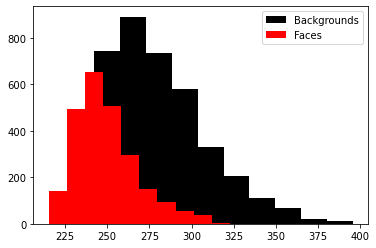

In [19]:
#plot histogram of distances
plt.hist(bgdists, color = 'black', label = 'Backgrounds')
plt.hist(facedists, color = 'red', label = 'Faces')
plt.legend()
plt.savefig("Histogram.png")
plt.show()